In [9]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib as mplt
import matplotlib.pyplot as plt
mplt.rcParams.update({'font.size': 18, 'font.family': 'sans-serif', 
                      'font.sans-serif':['Helvetica', 'Tahoma', 'DejaVu Sans',
                                 'Lucida Grande', 'Verdana']})
import yaml
from pprint import pprint, pformat
np.set_printoptions(precision=3, formatter={'float_kind':lambda x: "%.3f" % x})

In [17]:
xx = np.linspace(-1, 1, num=11)
bands = []
# 8 bands (each column is a band) and 11 kpts (each row is a k-pt)
bands.append(np.polyval([.7, 0, .3], xx))
bands.append(np.polyval([.65, 0, .3], xx))
bands.append(np.polyval([.3,-.4, 0.05], xx))
bands.append(np.polyval([.2, 0, 0], xx))
bands.append(np.polyval([-.2, 0, -0.4], xx))
bands.append(np.polyval([-.4, 0, -0.4], xx))
bands.append(np.polyval([-.8, 0, -0.4], xx))
bands.append(np.polyval([.2, 0, -1.4], xx))
bands = np.array(bands).transpose()
bands.sort(axis=1)
pprint (bands)
# insert kpt enumeration
bands = np.insert(bands, 0, np.arange(1,12), axis=1)
pprint(bands)
np.savetxt('./reference_data/fakebands.dat', bands, fmt=['%3d']+['%7.3f']*8)

array([[-1.200, -1.200, -0.800, -0.600, 0.200, 0.750, 0.950, 1.000],
       [-1.272, -0.912, -0.656, -0.528, 0.128, 0.562, 0.716, 0.748],
       [-1.328, -0.688, -0.544, -0.472, 0.072, 0.398, 0.534, 0.552],
       [-1.368, -0.528, -0.464, -0.432, 0.032, 0.258, 0.404, 0.412],
       [-1.392, -0.432, -0.416, -0.408, 0.008, 0.142, 0.326, 0.328],
       [-1.400, -0.400, -0.400, -0.400, 0.000, 0.050, 0.300, 0.300],
       [-1.392, -0.432, -0.416, -0.408, -0.018, 0.008, 0.326, 0.328],
       [-1.368, -0.528, -0.464, -0.432, -0.062, 0.032, 0.404, 0.412],
       [-1.328, -0.688, -0.544, -0.472, -0.082, 0.072, 0.534, 0.552],
       [-1.272, -0.912, -0.656, -0.528, -0.078, 0.128, 0.716, 0.748],
       [-1.200, -1.200, -0.800, -0.600, -0.050, 0.200, 0.950, 1.000]])
array([[1.000, -1.200, -1.200, -0.800, -0.600, 0.200, 0.750, 0.950, 1.000],
       [2.000, -1.272, -0.912, -0.656, -0.528, 0.128, 0.562, 0.716, 0.748],
       [3.000, -1.328, -0.688, -0.544, -0.472, 0.072, 0.398, 0.534, 0.552],
       

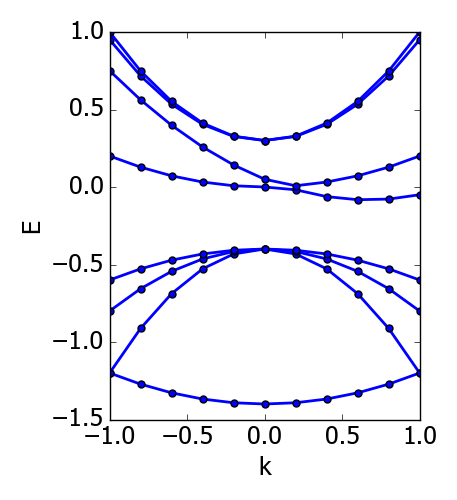

In [42]:
ref = np.loadtxt('./reference_data/fakebands.dat', unpack=True)
xx = np.linspace(-1, 1, num=ref.shape[1])

fig1, ax = plt.subplots(figsize=(4,5))
ax.set_xlabel('k')
ax.set_ylabel('E')
for ib in range(1, ref.shape[0]):
    ax.plot(xx, ref[ib], color='b', marker='o', markersize=5)

In [48]:
fig1.savefig('reference_data/fakebands.pdf')
fig1.savefig('reference_data/fakebands.png')

In [49]:
xx = np.linspace(-1, 1, num=11)
bands = []
bands.append(np.polyval([.7, 0, .3], xx))
bands.append(np.polyval([.65, 0, .3], xx))
bands.append(np.polyval([.3,-.4, 0.05], xx))
bands.append(np.polyval([.2, 0, 0], xx))
bands.append(np.polyval([-.2, 0, -0.4], xx))
bands.append(np.polyval([-.4, 0, -0.4], xx))
bands.append(np.polyval([-.8, 0, -0.4], xx))
bands.append(np.polyval([.2, 0, -1.4], xx))
bands = np.array(bands).transpose()
#insert random jitter
eps = 0.01
jitter = eps * (0.5 - random.random(bands.shape))
bands = bands + jitter
bands.sort(axis=1)
# remove some bands
bands = np.delete(bands, (0,6,7), 1)
# insert kpt enumeration
bands = np.insert(bands, 0, np.arange(1,12), axis=1)
print(bands)
np.savetxt('./reference_data/fakebands-2.dat', bands, fmt=['%3d']+['%7.3f']*5)

[[1.000 -1.198 -0.799 -0.596 0.195 0.748]
 [2.000 -0.909 -0.655 -0.527 0.125 0.560]
 [3.000 -0.693 -0.548 -0.475 0.069 0.396]
 [4.000 -0.531 -0.464 -0.434 0.033 0.257]
 [5.000 -0.427 -0.413 -0.404 0.012 0.138]
 [6.000 -0.405 -0.400 -0.396 0.001 0.055]
 [7.000 -0.431 -0.416 -0.408 -0.023 0.009]
 [8.000 -0.531 -0.466 -0.436 -0.058 0.029]
 [9.000 -0.689 -0.540 -0.472 -0.077 0.072]
 [10.000 -0.911 -0.657 -0.527 -0.078 0.125]
 [11.000 -1.198 -0.798 -0.600 -0.055 0.201]]


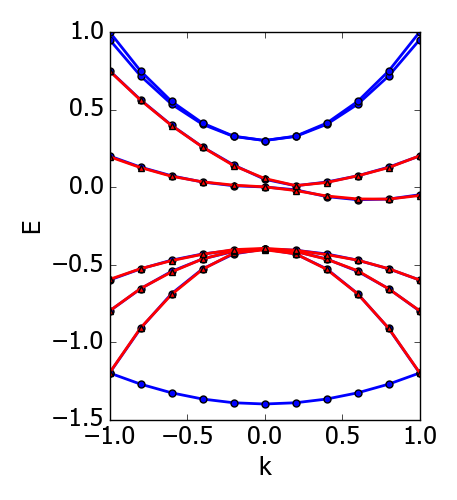

In [50]:
ref = np.loadtxt('./reference_data/fakebands.dat', unpack=True)
mod = np.loadtxt('./reference_data/fakebands-2.dat', unpack=True)
xx = np.linspace(-1, 1, num=ref.shape[1])

fig2, ax = plt.subplots(figsize=(4,5))
ax.set_xlabel('k')
ax.set_ylabel('E')
for ib in range(1, ref.shape[0]):
    ax.plot(xx, ref[ib], color='b', marker='o', markersize=5)
for ib in range(1, mod.shape[0]):
    ax.plot(xx, mod[ib], color='r', marker='^', markersize=5)

In [51]:
fig2.savefig('reference_data/fakebands-2.pdf')
fig2.savefig('reference_data/fakebands-2.png')

In [4]:
yamldata = """
    range: [ 1, 3, [4, 6], 8]
    """
from skopt import objectives as oo
rangespec = yaml.load(yamldata)['range']
pyrangespec = oo.get_ranges(rangespec)
print (pyrangespec)

[(0, 1), (2, 3), (3, 6), (7, 8)]


In [5]:
bandsubset = []
for rr in pyrangespec:
    bandsubset.extend(range(*rr))
print (bandsubset)
print (bands[np.array(bandsubset)])

[0, 2, 3, 4, 5, 7]
[[ 1.    -1.2   -1.272 -1.328 -1.368 -1.392 -1.4   -1.392 -1.368 -1.328
  -1.272 -1.2  ]
 [ 3.    -0.8   -0.656 -0.544 -0.464 -0.416 -0.4   -0.416 -0.464 -0.544
  -0.656 -0.8  ]
 [ 4.    -0.6   -0.528 -0.472 -0.432 -0.408 -0.4   -0.408 -0.432 -0.472
  -0.528 -0.6  ]
 [ 5.     0.2    0.128  0.072  0.032  0.008  0.    -0.018 -0.062 -0.082
  -0.078 -0.05 ]
 [ 6.     0.75   0.562  0.398  0.258  0.142  0.05   0.008  0.032  0.072
   0.128  0.2  ]
 [ 8.     1.     0.748  0.552  0.412  0.328  0.3    0.328  0.412  0.552
   0.748  1.   ]]


In [6]:
yamldata = """
    range: [ 1, 3]
    """
from skopt import objectives as oo
rangespec = yaml.load(yamldata)['range']
pyrangespec = oo.get_ranges(rangespec)
print (pyrangespec)

[(0, 1), (2, 3)]


In [7]:
bandsubset = []
for rr in pyrangespec:
    bandsubset.extend(range(*rr))
print (bandsubset)
print (bands[np.array(bandsubset)])

[0, 2]
[[ 1.    -1.2   -1.272 -1.328 -1.368 -1.392 -1.4   -1.392 -1.368 -1.328
  -1.272 -1.2  ]
 [ 3.    -0.8   -0.656 -0.544 -0.464 -0.416 -0.4   -0.416 -0.464 -0.544
  -0.656 -0.8  ]]


In [8]:
yamldata = """
    range: [[ 1, 3]]
    """
from skopt import objectives as oo
rangespec = yaml.load(yamldata)['range']
pyrangespec = oo.get_ranges(rangespec)
print (pyrangespec)

[(0, 3)]


In [9]:
dummy = test['key']

NameError: name 'test' is not defined

In [1]:
test = None
dummy = test['key']

TypeError: 'NoneType' object is not subscriptable

In [10]:
test = {}
dummy = test['key']

KeyError: 'key'

In [26]:
yamldata = """align: 
    ref: [8, 10]
    model: [4, max]
    """
alignment = yaml.load(yamldata)['align']
pprint(alignment)
ff = {'min':np.min, 'max':np.max}

{'model': [4, 'max'], 'ref': [8, 10]}


In [11]:
def get_shift(bands, refpt, ff = {'min':np.min, 'max':np.max}):
    """Return a reference value of a point from bands.
    
    The `refpt` specifier coult be:
        * (band index, k-point)
        * (band index, function-to-operate-on-the-band), e.g. (3, 'min')
    """
    iband = refpt[0] - 1  
    try:
        ik = refpt[1] - 1
        shift = bands[iband,ik]
    except TypeError:
        shift = ff[refpt[1]](bands[iband])
    return shift
        

#refpt = alignment['ref']
#shift = get_shift(bands, refpt, ff)

#refpt = alignment['model']
#shift = get_shift(bands, refpt, ff)


In [16]:
bands = np.loadtxt('reference_data/fakebands.dat')
bands = bands[:4, 1:]
pprint (bands)

array([[-1.2  , -1.272, -1.328, -1.368, -1.392, -1.4  , -1.392, -1.368,
        -1.328, -1.272, -1.2  ],
       [-1.2  , -0.912, -0.688, -0.528, -0.432, -0.4  , -0.432, -0.528,
        -0.688, -0.912, -1.2  ],
       [-0.8  , -0.656, -0.544, -0.464, -0.416, -0.4  , -0.416, -0.464,
        -0.544, -0.656, -0.8  ],
       [-0.6  , -0.528, -0.472, -0.432, -0.408, -0.4  , -0.408, -0.432,
        -0.472, -0.528, -0.6  ]])


In [17]:
shift = get_shift(bands, [4, 'max'])
print (shift)
bands -= shift
pprint (bands)

-0.4
array([[-0.8  , -0.872, -0.928, -0.968, -0.992, -1.   , -0.992, -0.968,
        -0.928, -0.872, -0.8  ],
       [-0.8  , -0.512, -0.288, -0.128, -0.032,  0.   , -0.032, -0.128,
        -0.288, -0.512, -0.8  ],
       [-0.4  , -0.256, -0.144, -0.064, -0.016,  0.   , -0.016, -0.064,
        -0.144, -0.256, -0.4  ],
       [-0.2  , -0.128, -0.072, -0.032, -0.008,  0.   , -0.008, -0.032,
        -0.072, -0.128, -0.2  ]])


In [18]:
mask = bands > -0.3
pprint (mask)

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
        False, False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]], dtype=bool)


In [16]:
print (bands[bandsubset])

[[ 1.    -1.2   -1.272 -1.328 -1.368 -1.392 -1.4   -1.392 -1.368 -1.328
  -1.272 -1.2  ]
 [ 3.    -0.8   -0.656 -0.544 -0.464 -0.416 -0.4   -0.416 -0.464 -0.544
  -0.656 -0.8  ]]


In [17]:
subset = bands[bandsubset]
print (subset)

[[ 1.    -1.2   -1.272 -1.328 -1.368 -1.392 -1.4   -1.392 -1.368 -1.328
  -1.272 -1.2  ]
 [ 3.    -0.8   -0.656 -0.544 -0.464 -0.416 -0.4   -0.416 -0.464 -0.544
  -0.656 -0.8  ]]


In [18]:
subset[0,3]

-1.3280000000000001

In [19]:
subset[0,'max']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [30]:
'max'-1

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [11]:
shape = (7, 10) # expect 7-row, 10-col data
exp = np.array(list(range(shape[1]))*shape[0]).reshape(*shape)
print(exp.shape)
for i in range(7):
    print (exp[i])
    print (i)
    exp[i] = exp[i]+i
pprint (exp)

(7, 10)
[0 1 2 3 4 5 6 7 8 9]
0
[0 1 2 3 4 5 6 7 8 9]
1
[0 1 2 3 4 5 6 7 8 9]
2
[0 1 2 3 4 5 6 7 8 9]
3
[0 1 2 3 4 5 6 7 8 9]
4
[0 1 2 3 4 5 6 7 8 9]
5
[0 1 2 3 4 5 6 7 8 9]
6
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])


In [14]:
pprint(exp[:,1:][:4])

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12]])


In [20]:
#delete column 0
small = np.delete(exp, obj=[0], axis=1)
pprint (small)
# delete row 1
small = np.delete(small, obj=[1], axis=0)
pprint (small)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15]])
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15]])


In [22]:
arr = np.loadtxt('reference_data/fakebands.dat')
print (arr.shape)
pprint (arr)
a1 = np.delete(arr, 0, axis=1)
pprint (a1)
a2 = np.delete(arr, [4,5,6,7], axis=0)
pprint (a2)

(8, 12)
array([[ 1.   , -1.2  , -1.272, -1.328, -1.368, -1.392, -1.4  , -1.392,
        -1.368, -1.328, -1.272, -1.2  ],
       [ 2.   , -1.2  , -0.912, -0.688, -0.528, -0.432, -0.4  , -0.432,
        -0.528, -0.688, -0.912, -1.2  ],
       [ 3.   , -0.8  , -0.656, -0.544, -0.464, -0.416, -0.4  , -0.416,
        -0.464, -0.544, -0.656, -0.8  ],
       [ 4.   , -0.6  , -0.528, -0.472, -0.432, -0.408, -0.4  , -0.408,
        -0.432, -0.472, -0.528, -0.6  ],
       [ 5.   ,  0.2  ,  0.128,  0.072,  0.032,  0.008,  0.   , -0.018,
        -0.062, -0.082, -0.078, -0.05 ],
       [ 6.   ,  0.75 ,  0.562,  0.398,  0.258,  0.142,  0.05 ,  0.008,
         0.032,  0.072,  0.128,  0.2  ],
       [ 7.   ,  0.95 ,  0.716,  0.534,  0.404,  0.326,  0.3  ,  0.326,
         0.404,  0.534,  0.716,  0.95 ],
       [ 8.   ,  1.   ,  0.748,  0.552,  0.412,  0.328,  0.3  ,  0.328,
         0.412,  0.552,  0.748,  1.   ]])
array([[-1.2  , -1.272, -1.328, -1.368, -1.392, -1.4  , -1.392, -1.368,
        -1.328,

In [4]:
list([4,4])

[4, 4]

In [5]:
[[3,4]]

[[3, 4]]

In [6]:
list(4)

TypeError: 'int' object is not iterable

In [23]:
from numpy.random import random
a = random(10).reshape(2,5)
b = random(10).reshape(2,5)
l = [a, b]
f = a[0][0]

aa = np.atleast_1d(a)
al = np.atleast_1d(l)
af = np.atleast_1d(f)

print ('a:\n', aa, aa.shape, len(aa))

print ('l:\n', al, al.shape, len(al), al[0])
print ('f:\n', af, af.shape, len(af))



a:
 [[0.325 0.324 0.334 0.386 0.335]
 [0.484 0.610 0.842 0.355 0.201]] (2, 5) 2
l:
 [[[0.325 0.324 0.334 0.386 0.335]
  [0.484 0.610 0.842 0.355 0.201]]

 [[0.093 0.984 0.661 0.672 0.456]
  [0.051 0.948 0.099 0.867 0.028]]] (2, 2, 5) 2 [[0.325 0.324 0.334 0.386 0.335]
 [0.484 0.610 0.842 0.355 0.201]]
f:
 [0.325] (1,) 1


56-17

In [15]:
56 - 17

39

In [24]:
5%4

1

In [25]:
6%4

2

In [26]:
7%4

3

In [27]:
3%4

3

In [29]:
np.linspace(0,1,4)

array([0.000, 0.333, 0.667, 1.000])